In [1]:
import sys
sys.path.append("..")

from datetime import datetime
import numpy as np
import ujson as json
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from lib.dataclasses import SignalDCT, SignalTime, SingleSample, Sample, SignalSpectrum
from lib.utils import get_sample_from_json

from copy import deepcopy

plt.style.use('ggplot')
from matplotlib.gridspec import GridSpec

In [2]:
PATH_TO_SAMPLE = "/workspaces/project/raw/time_examples/2022_11_16_19_44.json"

Loading signal

In [3]:
sample_id = PATH_TO_SAMPLE.split(".json")[0].split("/")[-1]

time_sample = get_sample_from_json(PATH_TO_SAMPLE, sample_id, dct=False)
dct_sample = deepcopy(time_sample)
dct_sample.convert_to_dct()

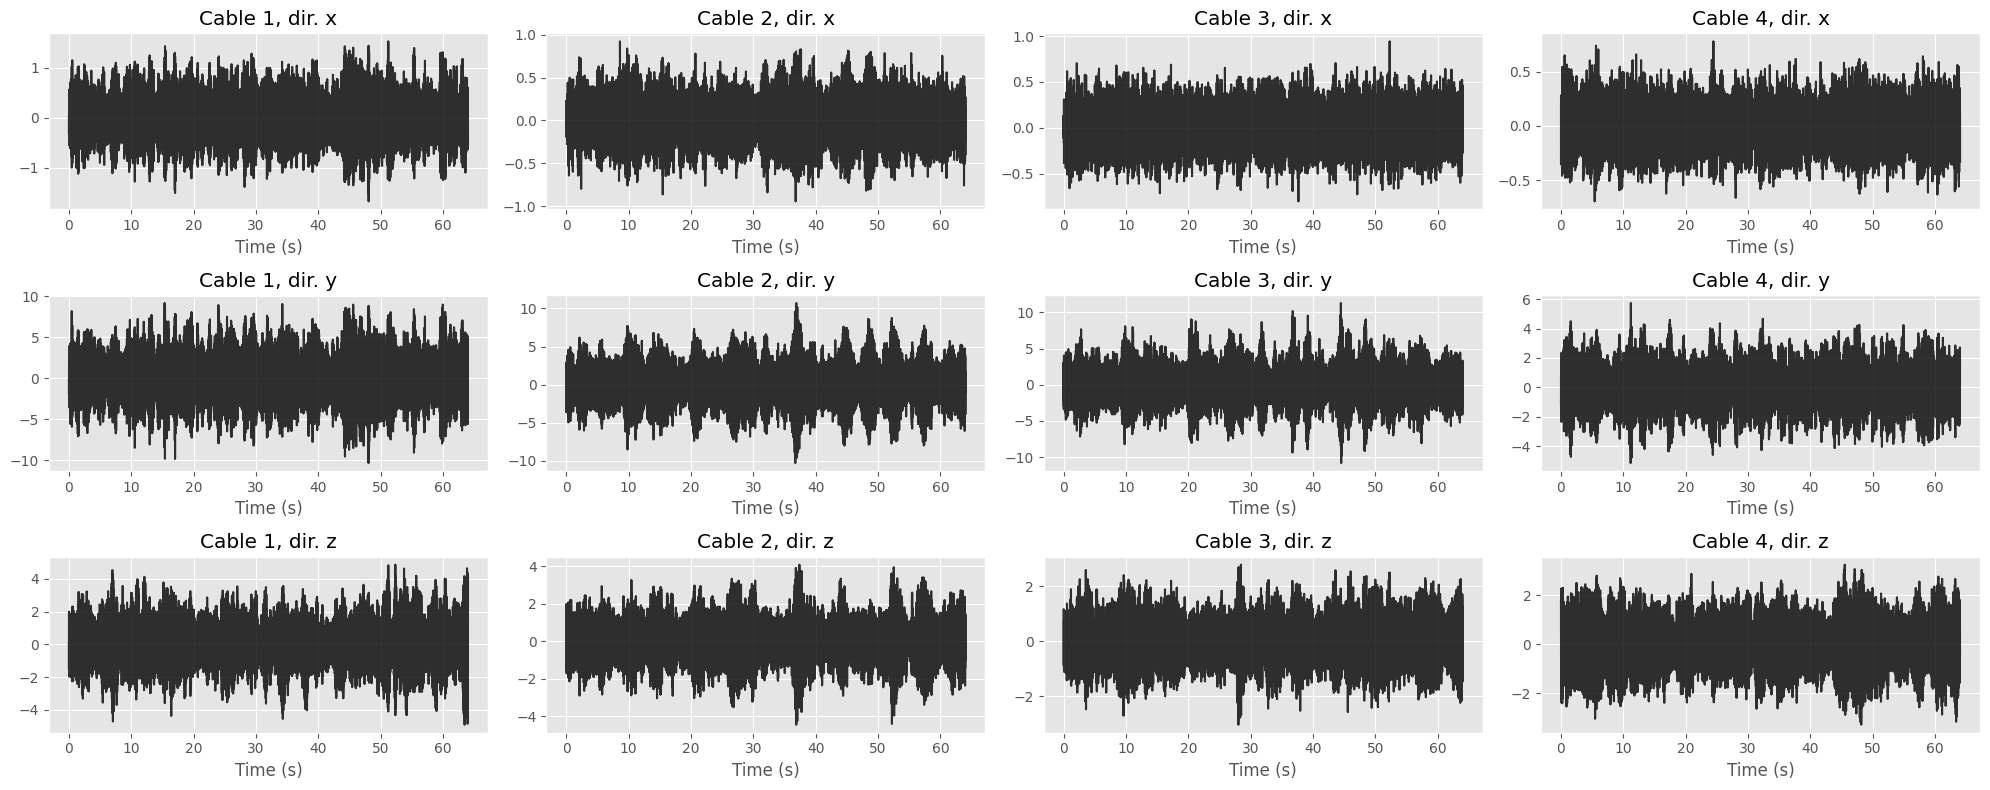

In [4]:
possible_directions = ["x", "y", "z"]

fig = plt.figure(figsize=(20,8))
i = 0
for dir in possible_directions:
    for cable in range(4):
        ax = fig.add_subplot(3, 4, i+1)
        t, x = time_sample[cable][dir].get_signal()
        ax.plot(t, x, color="k", alpha=0.8)
        ax.set_xlabel("Time (s)", fontsize=12)
        ax.set_title(f"Cable {cable+1}, dir. {dir}")
        i+=1
plt.tight_layout()

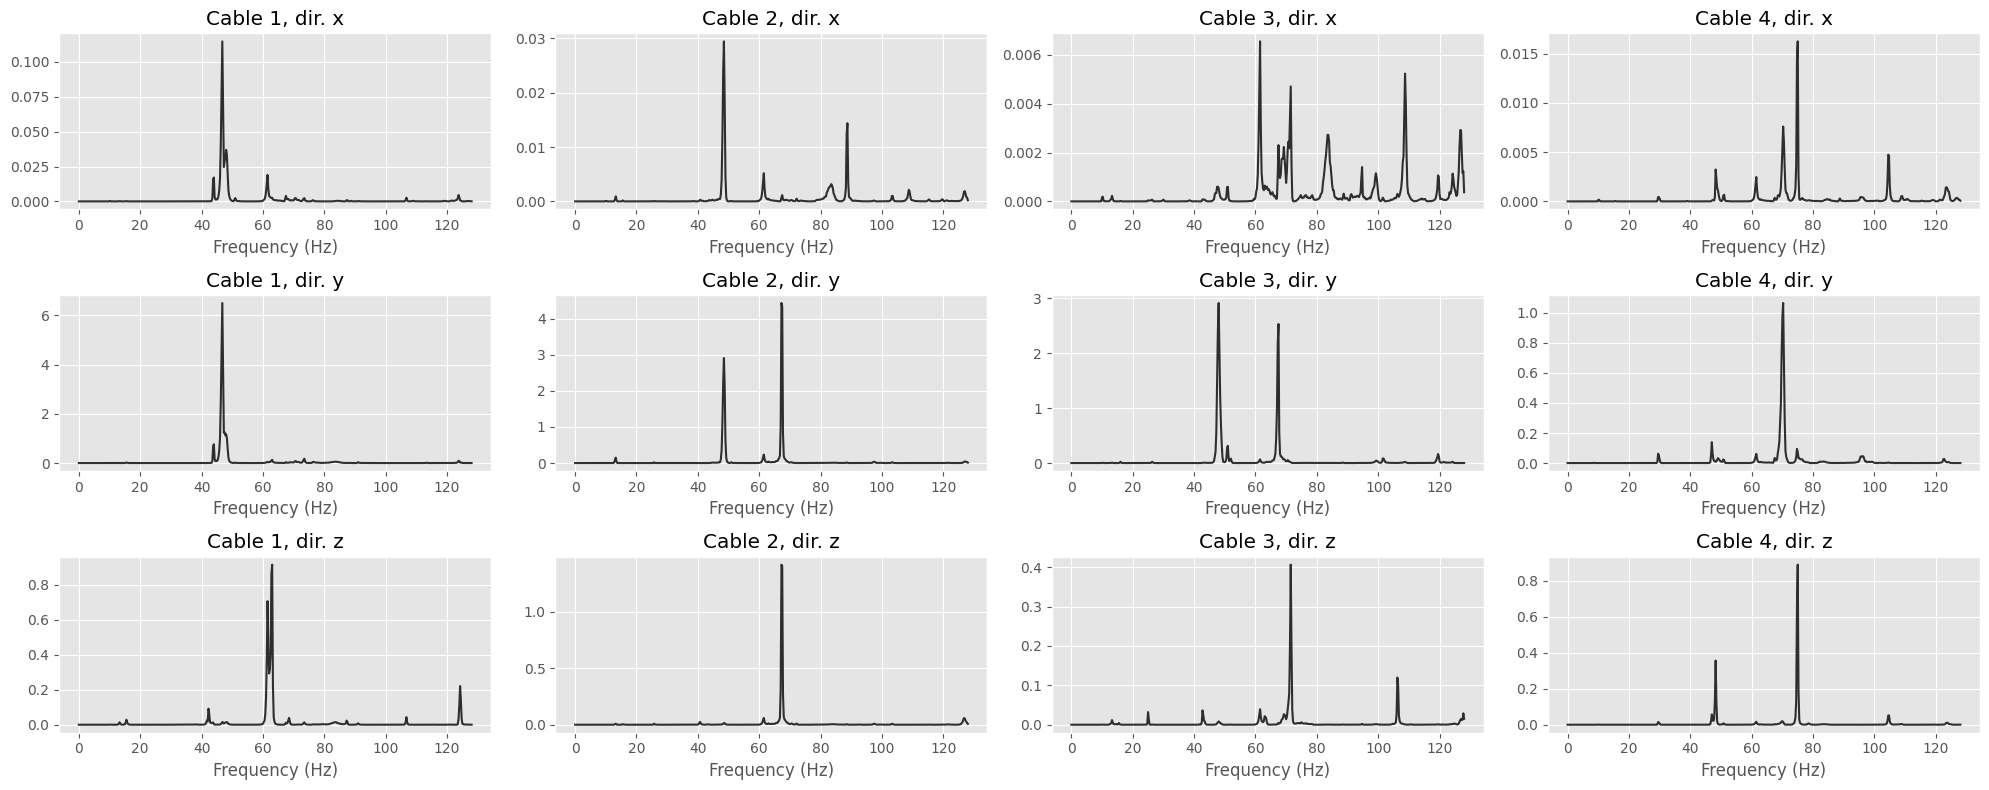

In [5]:
possible_directions = ["x", "y", "z"]

fig = plt.figure(figsize=(20,8))
i = 0
for dir in possible_directions:
    for cable in range(4):
        ax = fig.add_subplot(3, 4, i+1)
        spectrum = time_sample[cable][dir].to_spectrum(window="hamming", nperseg=1024, poverlap=0.5)
        f, psd = spectrum.get_spectrum()
        ax.plot(f, psd, color="k", alpha=0.8)
        ax.set_xlabel("Frequency (Hz)", fontsize=12)
        ax.set_title(f"Cable {cable+1}, dir. {dir}")
        i+=1
plt.tight_layout()

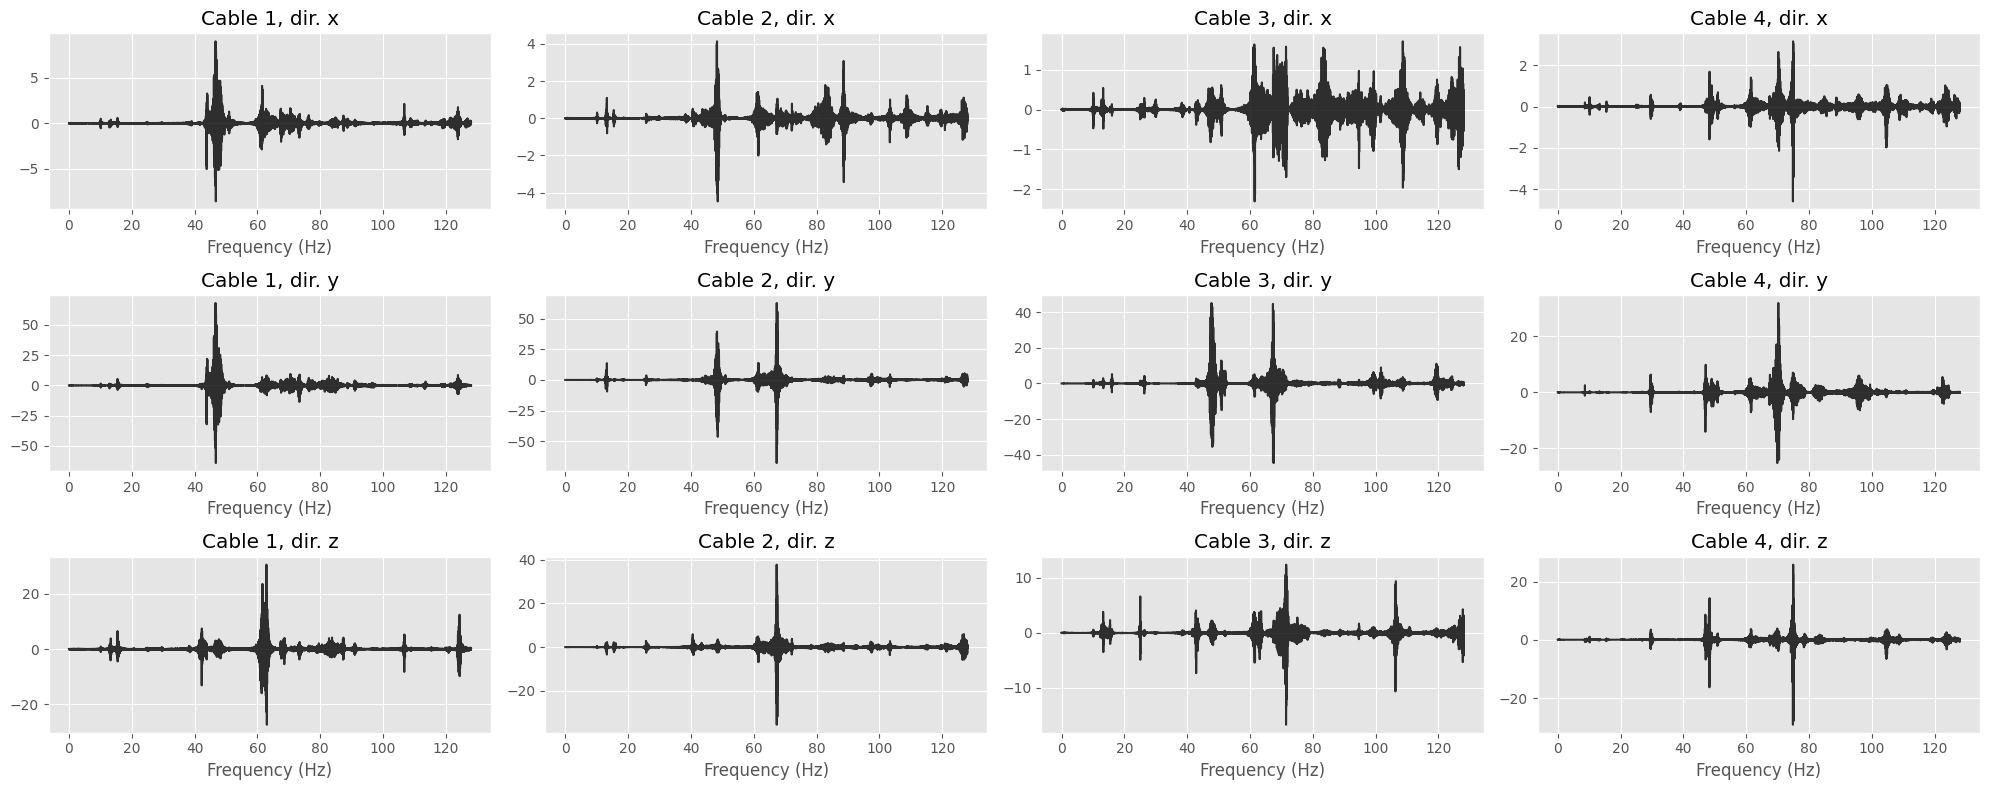

In [6]:
possible_directions = ["x", "y", "z"]

fig = plt.figure(figsize=(20,8))
i = 0
for dir in possible_directions:
    for cable in range(4):
        ax = fig.add_subplot(3, 4, i+1)
        dct = dct_sample[cable][dir]
        idx, x = dct.get()
        f = np.linspace(0, 1/dct.ts/2, len(idx))
        ax.plot(f, x, color="k", alpha=0.8)
        ax.set_xlabel("Frequency (Hz)", fontsize=12)
        ax.set_title(f"Cable {cable+1}, dir. {dir}")
        i+=1
plt.tight_layout()

In [8]:
dct_sample_compressed = deepcopy(dct_sample)
dct_sample_compressed.compress()

AttributeError: 'SingleSample' object has no attribute 'compute_dct_threshold'

In [ ]:
for 